In [375]:
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [376]:
# loading given train and test dataset
df = pd.read_csv(r"C:\Users\rahul.a.tripathi\Desktop\Nokia\ebay.csv")
df = df.fillna(0)

In [377]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)  

In [378]:
X = df.iloc[:, [0,2,4,5,6,7,8,9]].values
y = df.iloc[:, [1]].values

In [379]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [380]:
#random forest
# selected max_depth 10 and n_estimator = 120 as hyperparameter of random forest
model_rf = RandomForestClassifier(max_depth = 10, n_estimators = 120)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

C:\Users\rahul.a.tripathi\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [381]:
# Predicting the Test set results
y_pred = model_rf.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
rf = confusion_matrix(y_test, y_pred)
print "Confusion Matrix"
print rf

model_rf.feature_importances_

from sklearn.metrics import accuracy_score
print "Accuracy Score"
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[712  25]
 [154  58]]
Accuracy Score
0.8113804004214963


In [382]:
# Displaying ROC Curve
#ROC Curve
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC_curve)')
plt.legend(loc="lower right")

Feature ranking:
1. feature 1 (0.508515)
2. feature 3 (0.143607)
3. feature 5 (0.080511)
4. feature 7 (0.074998)
5. feature 6 (0.064195)
6. feature 2 (0.051847)
7. feature 4 (0.042893)
8. feature 0 (0.033434)


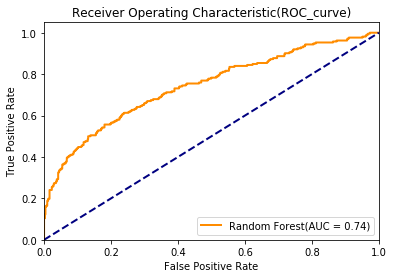

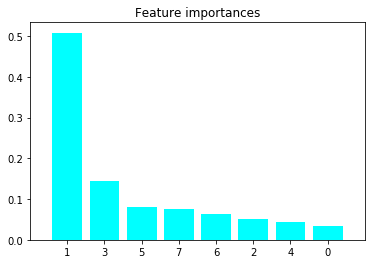

In [383]:
# selecting important features in the dataset
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(2)
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="cyan", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()